## Imports

Start this analysis with EDA then proceed to conducting an inferential analysis. 

The following libraries will be crucial in these first steps.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
from statsmodels.formula.api import ols
import warnings

load the data ...

In [2]:
df = pd.read_csv('.\data\kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

## King County Dataset Column Descriptions

* **id:** Unique identifier for a house.
* **date:** Date house was sold.
* **price:** Sale price (prediction target).
* **bedrooms:** Number of bedrooms.
* **bathrooms:** Number of bathrooms.
* **sqft_living:** Square footage of living space in the home.
* **sqft_lot:** Square footage of the lot.
* **floors:** Number of floors (levels) in house.
* **waterfront:** Whether the house is on a waterfront.
* **view:** Quality of view from house.
* **condition:** How good the overall condition of the house is. Related to maintenance of house
* **grade:** Overall grade of the house. Related to the construction and design of the house.
* **sqft_above:** Square footage of house apart from basement.
* **sqft_basement:** Square footage of the basement.
* **yr_built:** Year when house was built.
* **yr_renovated:** Year when house was renovated.
* **zipcode:** ZIP Code used by the United States Postal Service.
* **lat:** Latitude coordinate.
* **long:** Longitude coordinate.
* **sqft_living15:** The square footage of interior housing living space for the nearest 15 neighbors.
* **sqft_lot15:** The square footage of the land lots of the nearest 15 neighbors.

## Exploratory Data Analysis (EDA)

Examine the dataframe, identify inconsistencies, provide a summary statistics of the dataframe to device the best possible solution to rectifying inconsistencies if any.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

Check for null values ...

In [5]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

## Data cleaning

In [6]:
waterfront_count = df['waterfront'].value_counts()
view_count = df['view'].value_counts()
yr_renovated_count = df['yr_renovated'].value_counts()

print(waterfront_count, view_count, yr_renovated_count)

waterfront
NO     19075
YES      146
Name: count, dtype: int64 view
NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: count, dtype: int64 yr_renovated
0.0       17011
2014.0       73
2013.0       31
2003.0       31
2007.0       30
          ...  
1951.0        1
1953.0        1
1946.0        1
1976.0        1
1948.0        1
Name: count, Length: 70, dtype: int64


Fill in the missing values in the following columns as folllows;

* **waterfront:** Replace NaN with 'UNKNOWN'.
* **view:** Replace Nan with 'UNRATED'.
* **yr_renovated:** Replace null with 0 to indicate the houses were never renovated.

In [7]:
# 'waterfront'
df['waterfront'] = df['waterfront'].fillna('UNKNOWN')

# 'view'
df['view'] = df['view'].fillna('UNRATED')

# 'yr_renovated'
df['yr_renovated'] = df['yr_renovated'].fillna('0')

df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Change the data types of the following columns;

* **id:** integer to object
* **date:** object to datetime
* **bathrooms:** float to integer
* **floors:** float to integer
* **sqft_basement:** object to float
* **yr_renovated:** float to integer
* **zipcode:** integer to object

In [8]:
# convert integers to objects
int_to_obj = ['id', 'zipcode']
df[int_to_obj] = df[int_to_obj].astype(object)

# convert floats to the nearest integer
floats_to_int = ['bathrooms', 'floors', 'yr_renovated']
df[floats_to_int] = df[floats_to_int].round().astype(int)

#convert objects to floats
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'], errors = 'coerce')
df['sqft_basement'].fillna(0.0, inplace = True)

#Convert date object to datetime
df['date'] = pd.to_datetime(df['date'])

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  object        
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  int32         
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  int32         
 8   waterfront     21597 non-null  object        
 9   view           21597 non-null  object        
 10  condition      21597 non-null  object        
 11  grade          21597 non-null  object        
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  float64       
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   2159

## Data Mapping

A strategic solution to creating more numeric variables which will be essential for modeling.

In [9]:
waterfront_count = df['waterfront'].value_counts()
view_count = df['view'].value_counts()
condition_count = df['condition'].value_counts()


grade_count = df['grade'].value_counts()

print(waterfront_count, view_count, condition_count, grade_count)

waterfront
NO         19075
UNKNOWN     2376
YES          146
Name: count, dtype: int64 view
NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
UNRATED         63
Name: count, dtype: int64 condition
Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: count, dtype: int64 grade
7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: count, dtype: int64


In [10]:
# Define 'waterfront' mapping
waterfront_map = {
    'NO' : -1,
    'UNKNOWN' : 0,
    'YES' : 1
}

# Fit waterfront_map into 'waterfront'
df['waterfront'] = df['waterfront'].map(waterfront_map)


# Define 'view' mapping
view_map = {
    'NONE' : -1,
    'UNRATED' : 0,
    'FAIR' : 1,
    'AVERAGE' : 2,
    'GOOD' : 3,
    'EXCELLENT' : 4
}

# Fit view_map into 'view'
df['view'] = df['view'].map(view_map)


# Define 'condition' mapping
condition_map = {
    'Poor' : 1,
    'Fair' : 2,
    'Average' : 3,
    'Good' : 4,
    'Very Good' : 5
}

# Fit condition_map into 'condition'
df['condition'] = df['condition'].map(condition_map)


# Define 'grade' mapping
grade_map = {
    '3 Poor' : 1,
    '4 Low' : 2,
    '5 Fair' : 3,
    '6 Low Average' : 4,
    '7 Average' : 5,
    '8 Good' : 6,
    '9 Better' : 7,
    '10 Very Good' : 8,
    '11 Excellent' : 9,
    '12 Luxury' : 10,
    '13 Mansion' : 11
}

df['grade'] = df['grade'].map(grade_map)


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  object        
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  int32         
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  int32         
 8   waterfront     21597 non-null  int64         
 9   view           21597 non-null  int64         
 10  condition      21597 non-null  int64         
 11  grade          21597 non-null  int64         
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  float64       
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   2159

check for duplicates

In [11]:
df.duplicated().sum()

0

check for duplicates in the 'id' column as it should serve as a unique identifier ...

In [12]:
df['id'].nunique()

21420

In [13]:
id_duplicates = df.groupby('id').filter(lambda x: len(x) > 1)
id_duplicates


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
93,6021501535,2014-07-25,430000.0,3,2,1580,5000,1,-1,-1,...,6,1290,290.0,1939,0,98117,47.6870,-122.386,1570,4500
94,6021501535,2014-12-23,700000.0,3,2,1580,5000,1,-1,-1,...,6,1290,290.0,1939,0,98117,47.6870,-122.386,1570,4500
313,4139480200,2014-06-18,1380000.0,4,3,4290,12103,1,-1,3,...,9,2690,1600.0,1997,0,98006,47.5503,-122.102,3860,11244
314,4139480200,2014-12-09,1400000.0,4,3,4290,12103,1,-1,3,...,9,2690,1600.0,1997,0,98006,47.5503,-122.102,3860,11244
324,7520000520,2014-09-05,232000.0,2,1,1240,12092,1,0,-1,...,4,960,280.0,1922,1984,98146,47.4957,-122.352,1820,7460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20654,8564860270,2015-03-30,502000.0,4,2,2680,5539,2,0,-1,...,6,2680,0.0,2013,0,98045,47.4759,-121.734,2680,5992
20763,6300000226,2014-06-26,240000.0,4,1,1200,2171,2,-1,-1,...,5,1200,0.0,1933,0,98133,47.7076,-122.342,1130,1598
20764,6300000226,2015-05-04,380000.0,4,1,1200,2171,2,-1,-1,...,5,1200,0.0,1933,0,98133,47.7076,-122.342,1130,1598
21564,7853420110,2014-10-03,594866.0,3,3,2780,6000,2,-1,-1,...,7,2780,0.0,2013,0,98065,47.5184,-121.886,2850,6000


## Data cleaning 

Sort the 'id' duplicated rows by date, keep the rows with the latest dates and drop the rest ...

In [14]:
# sort the df according to date
df = df.sort_values(by= 'date')

# reset the index and drop the old one
df = df.reset_index(drop= True)

# Drop rows with duplicate id but keep the last row
df = df.drop_duplicates(subset= 'id', keep= 'last')

df.shape

(21420, 21)

## Feature Engineering

Get the total sqft of the houses by adding the 'sqft_above' to 'sqft_basement', then drop the 'sqft_above' and the 'sqft_basement' columns.

In [15]:
df['total_sqft'] = df['sqft_above'] + df['sqft_basement']

df = df.drop(columns= ['sqft_above', 'sqft_basement'])

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21420 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21420 non-null  object        
 1   date           21420 non-null  datetime64[ns]
 2   price          21420 non-null  float64       
 3   bedrooms       21420 non-null  int64         
 4   bathrooms      21420 non-null  int32         
 5   sqft_living    21420 non-null  int64         
 6   sqft_lot       21420 non-null  int64         
 7   floors         21420 non-null  int32         
 8   waterfront     21420 non-null  int64         
 9   view           21420 non-null  int64         
 10  condition      21420 non-null  int64         
 11  grade          21420 non-null  int64         
 12  yr_built       21420 non-null  int64         
 13  yr_renovated   21420 non-null  int32         
 14  zipcode        21420 non-null  object        
 15  lat            21420 non

## Summary statistics

In [16]:
numeric_df = df.select_dtypes(include= 'number')

desc = numeric_df.describe()

numeric_df_median = numeric_df.median()
numeric_df_mode = numeric_df.mode().iloc[0]

# Add median and mode to the summary statistics
desc.loc['median'] = numeric_df_median
desc.loc['mode'] = numeric_df_mode

desc

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,total_sqft
count,2.142000e+04,21420.000000,21420.000000,21420.000000,2.142000e+04,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000
mean,5.418614e+05,3.373950,2.061951,2083.132633,1.512804e+04,1.536461,-0.876517,-0.664846,3.410784,5.662792,1971.092997,68.956723,47.560197,-122.213784,1988.384080,12775.718161,2077.107236
std,3.675569e+05,0.925405,0.754611,918.808412,4.153080e+04,0.554534,0.349102,1.047607,0.650035,1.171971,29.387141,364.552298,0.138589,0.140791,685.537057,27345.621867,917.951471
min,7.800000e+04,1.000000,0.000000,370.000000,5.200000e+02,1.000000,-1.000000,-1.000000,1.000000,1.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000,370.000000
25%,3.249500e+05,3.000000,2.000000,1430.000000,5.040000e+03,1.000000,-1.000000,-1.000000,3.000000,5.000000,1952.000000,0.000000,47.471200,-122.328000,1490.000000,5100.000000,1420.000000
50%,4.505500e+05,3.000000,2.000000,1920.000000,7.614000e+03,2.000000,-1.000000,-1.000000,3.000000,5.000000,1975.000000,0.000000,47.572100,-122.230000,1840.000000,7620.000000,1910.000000
75%,6.450000e+05,4.000000,2.000000,2550.000000,1.069050e+04,2.000000,-1.000000,-1.000000,4.000000,6.000000,1997.000000,0.000000,47.678100,-122.125000,2370.000000,10086.250000,2550.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,4.000000,1.000000,4.000000,5.000000,11.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000,13540.000000
median,4.505500e+05,3.000000,2.000000,1920.000000,7.614000e+03,2.000000,-1.000000,-1.000000,3.000000,5.000000,1975.000000,0.000000,47.572100,-122.230000,1840.000000,7620.000000,1910.000000
mode,4.500000e+05,3.000000,2.000000,1300.000000,5.000000e+03,1.000000,-1.000000,-1.000000,3.000000,5.000000,2014.000000,0.000000,47.532200,-122.290000,1540.000000,5000.000000,1300.000000


## Pair plot

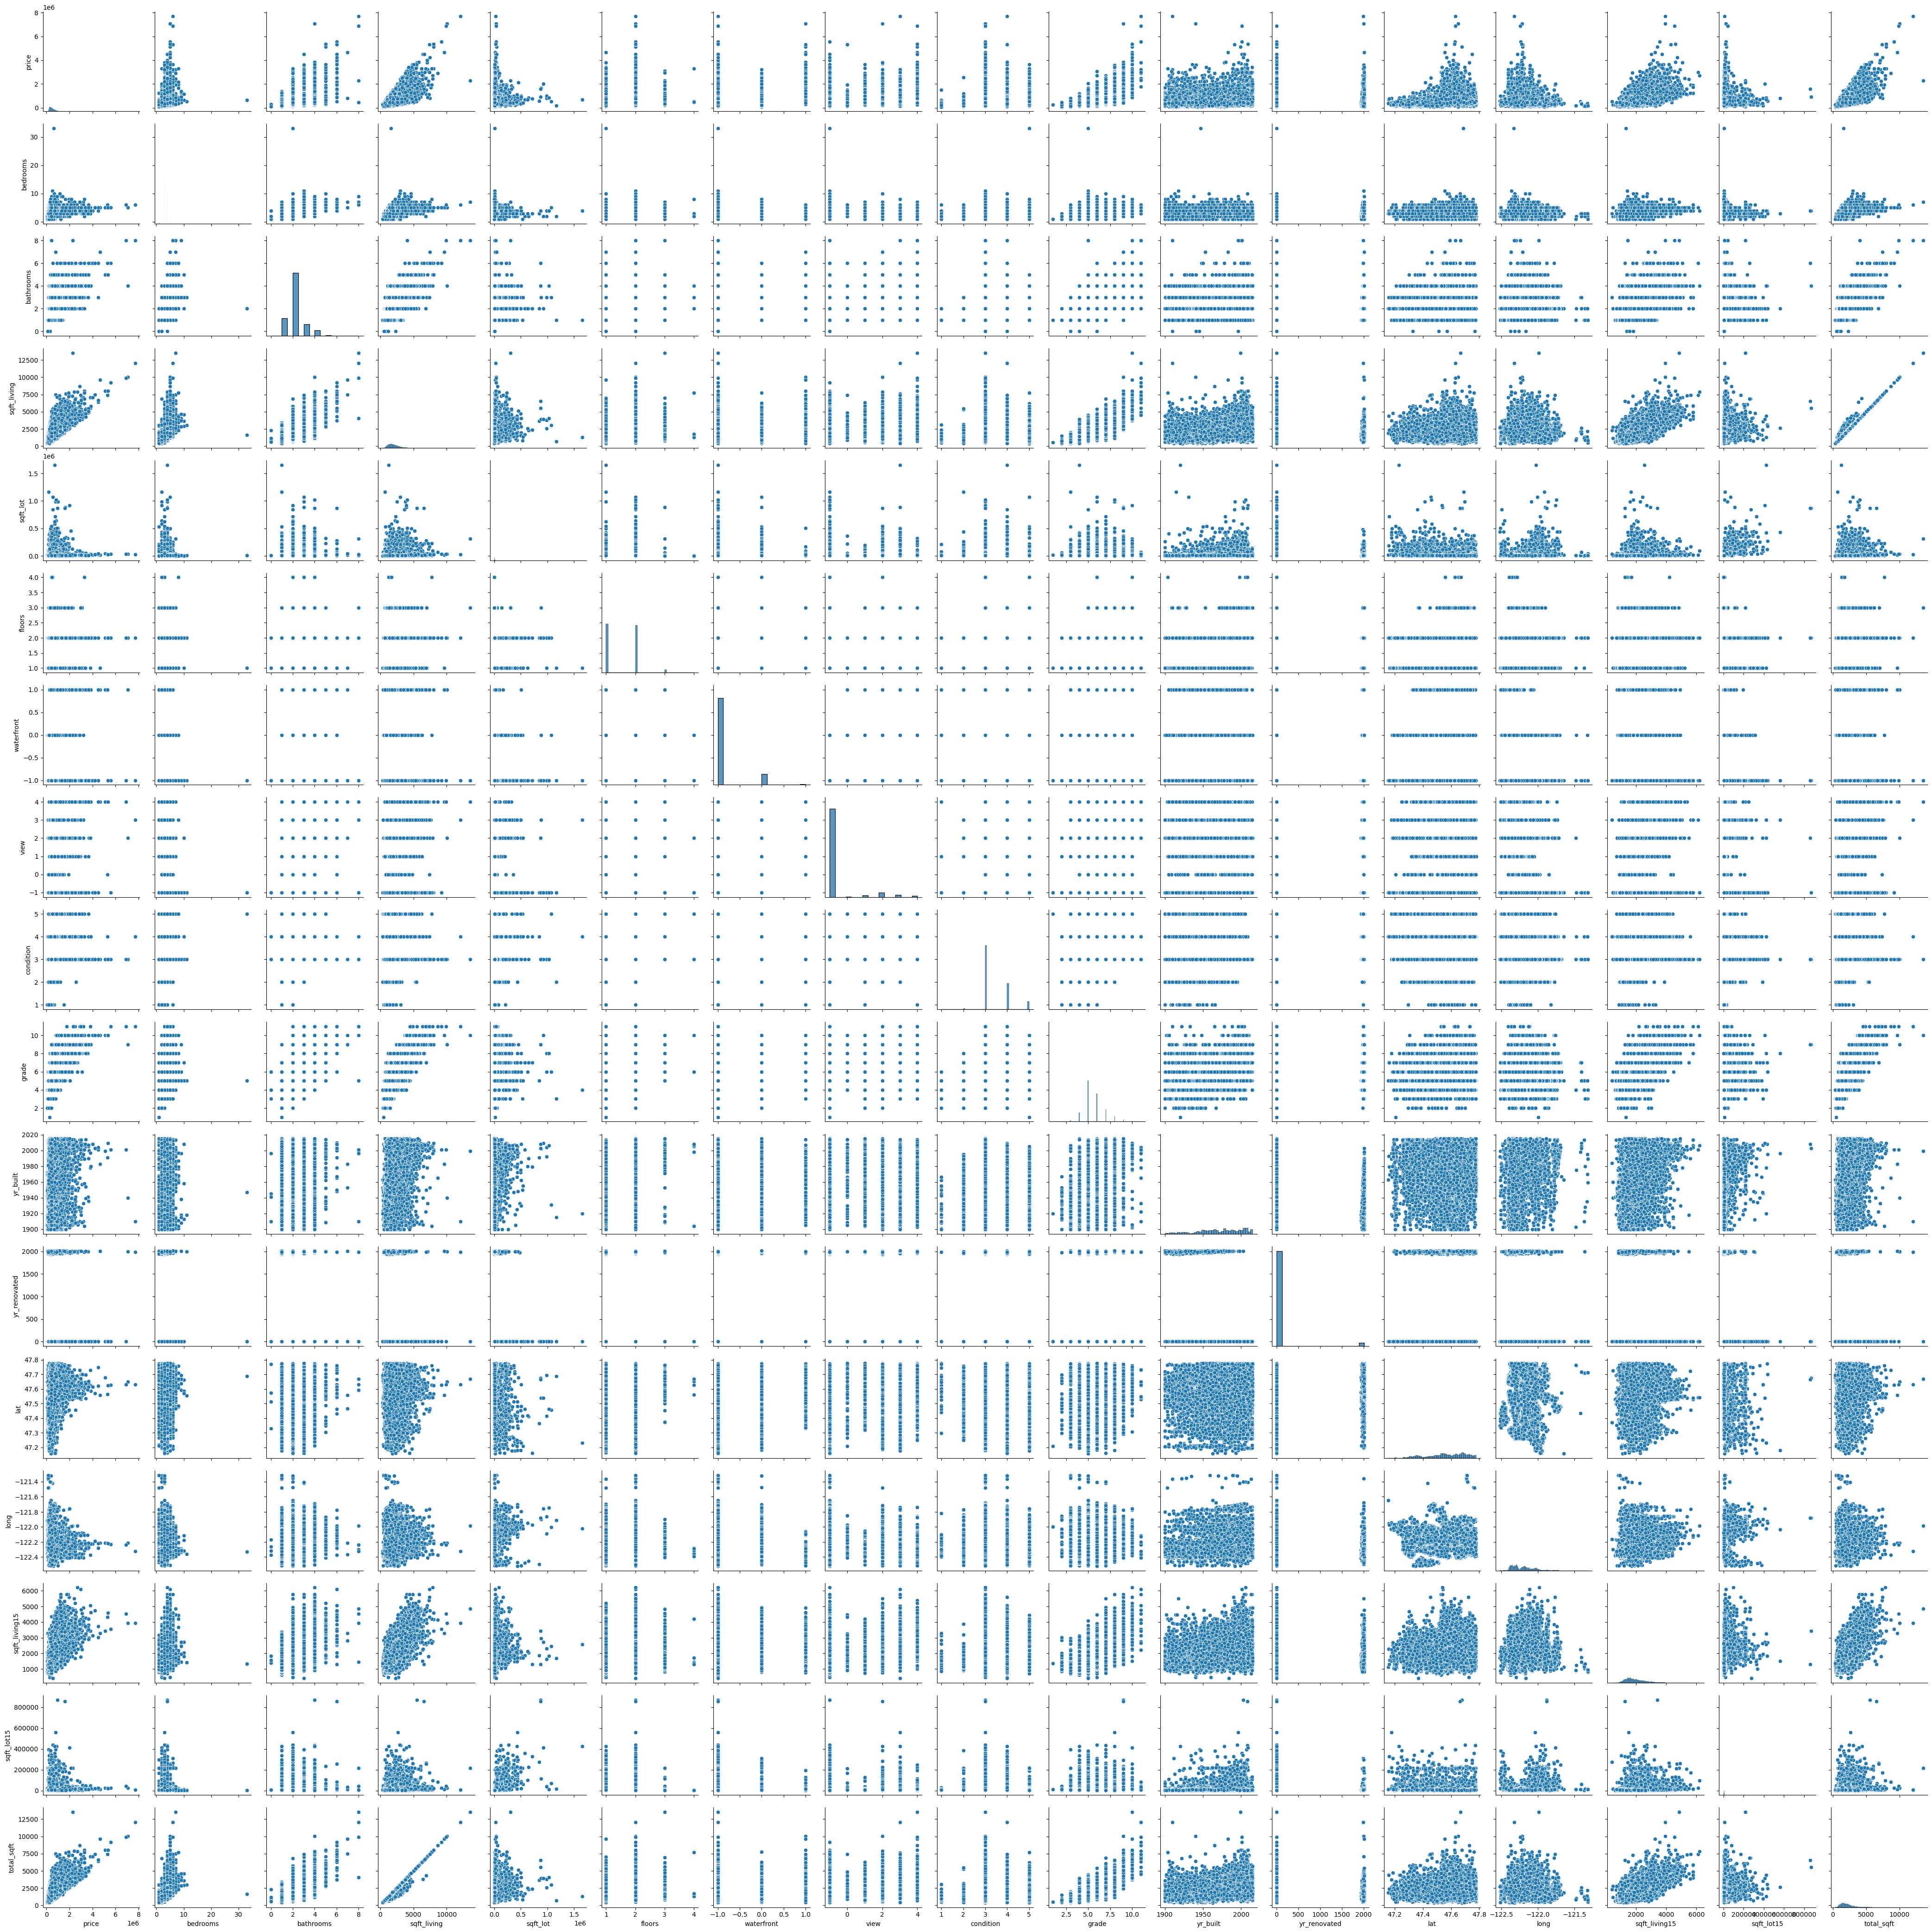

In [17]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category= FutureWarning)

    sns.pairplot(numeric_df)

## Drop columns

* **yr_renovated:** The data distribution is highly right skewed indicating insufficient data as most houses are not renovated.
* **sqft_lot15:** Very high presence of several outliers.
* **date:** Not all houses were sold.

According to the summary statistics most houses are located in the same location, therefore the following columns will be dropped to reduce the problem of redundancy;

* lat
* long
* zipcode

In [18]:
df = df.drop(columns= ['yr_renovated', 'sqft_lot15', 'date', 'lat', 'long', 'zipcode'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21420 entries, 0 to 21596
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21420 non-null  object 
 1   price          21420 non-null  float64
 2   bedrooms       21420 non-null  int64  
 3   bathrooms      21420 non-null  int32  
 4   sqft_living    21420 non-null  int64  
 5   sqft_lot       21420 non-null  int64  
 6   floors         21420 non-null  int32  
 7   waterfront     21420 non-null  int64  
 8   view           21420 non-null  int64  
 9   condition      21420 non-null  int64  
 10  grade          21420 non-null  int64  
 11  yr_built       21420 non-null  int64  
 12  sqft_living15  21420 non-null  int64  
 13  total_sqft     21420 non-null  float64
dtypes: float64(2), int32(2), int64(9), object(1)
memory usage: 2.3+ MB


## Outliers

Due to the skewed distribution of the numeric data, check for outliers

In [ ]:
numeric_df = df.select_dtypes(include= 'number')

